<a href="https://colab.research.google.com/github/darkginka/Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [ ]:
#food_nutrition.info()
food_nutrition.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Phosphorus,Potassium,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_E,Vitamin_K
0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,7,0,4.46,14,16.0,0.0,0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,7,0,4.67,12,17.8,0.0,0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [ ]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             92 non-null     int64 
 1   disease                92 non-null     object
 2   ineficient_nutritions  92 non-null     object
 3   Precaution_1           92 non-null     object
 4   Precaution_2           84 non-null     object
 5   Precaution_3           65 non-null     object
 6   Precaution_4           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


**Part-1**

In [ ]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [ ]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-101
  fd= disease_nutrition.iloc[i]
  pre_list = [fd["Precaution_1"],fd["Precaution_2"],fd["Precaution_3"],fd["Precaution_4"]]
  print("Precauctions: ",pre_list)         
  disease_ie = get_disease_ie(disease_name)
  dis_list = list(disease_ie.split(" "))
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print("Ineficient Nnutritions: ",dis_list)

Enter Disease Name: acne
Precauctions:  ['bath twice', 'avoid fatty spicy food', 'drink plenty of Water', 'avoid too many products']
Ineficient Nnutritions:  ['SaturatedFat', 'Fiber', 'Riboflavin', 'Vitamin_A', 'Zinc', 'Vitamin_D', 'Vitamin_E']


**Part-2**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

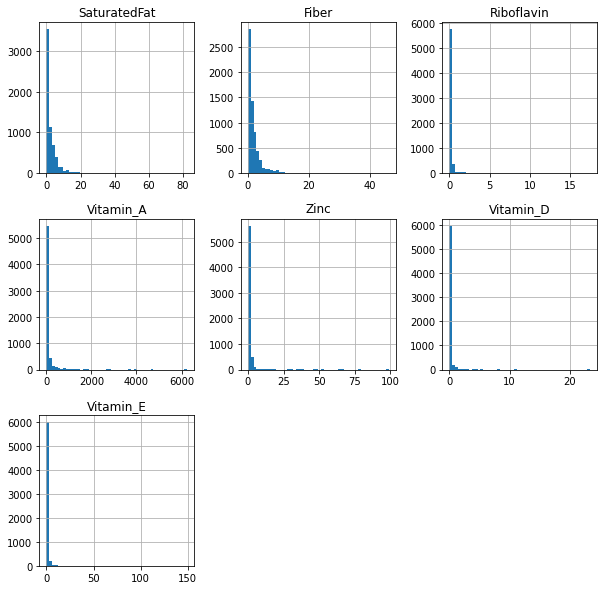

In [ ]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_cluster = dis_list

In [ ]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.         0.00205714 0.0097522  0.0017196  0.00059893
 0.00053548]


In [ ]:
columns_to_cluster_scaled = dis_list

In [ ]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

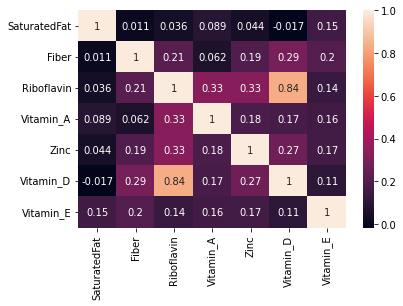

In [ ]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters = range(2,21)
ssd = []
sc = []
dict={}
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)
#calculate the goodness of a clustering
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))
    dict[n] = score


Number of Clusters = 2, Silhouette Score = 0.6323501656425353
Number of Clusters = 3, Silhouette Score = 0.5883435112707048
Number of Clusters = 4, Silhouette Score = 0.5958672549990905
Number of Clusters = 5, Silhouette Score = 0.5421756748924406
Number of Clusters = 6, Silhouette Score = 0.3933382110515812
Number of Clusters = 7, Silhouette Score = 0.4030905206718632
Number of Clusters = 8, Silhouette Score = 0.36280266075311857
Number of Clusters = 9, Silhouette Score = 0.3639610502373998
Number of Clusters = 10, Silhouette Score = 0.3743216120814354
Number of Clusters = 11, Silhouette Score = 0.37576417736469303
Number of Clusters = 12, Silhouette Score = 0.3849572125930139
Number of Clusters = 13, Silhouette Score = 0.3076206527886597
Number of Clusters = 14, Silhouette Score = 0.303461337098808
Number of Clusters = 15, Silhouette Score = 0.30896828324444237
Number of Clusters = 16, Silhouette Score = 0.3113928218474605
Number of Clusters = 17, Silhouette Score = 0.305259033166040

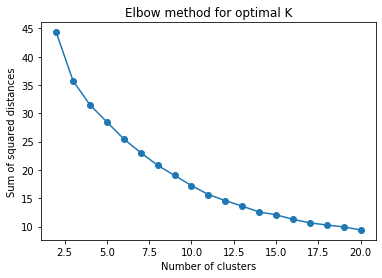

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [ ]:
# kk=[]
# kk.clear()
# for i in range(len(sc)-1):
#   kk.append(sc[i]-sc[i+1])
# k=kk.index(max(kk))+3

In [315]:
k=7
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
# print(pred)
# print(model.labels_)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [0 0 0 0 0 0 0 0 0 0]


**Visualizing the clusters**

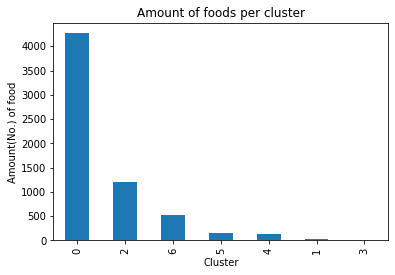

In [ ]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount(No.) of food')
plt.title('Amount of foods per cluster')
plt.show()

In [316]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

0    4266
2    1204
6     531
5     150
4     133
1      36
3      12
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  12


In [317]:
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Potato salad, made with light Italian dressing"
0,"Crackers, oyster"
0,"Coffee, Cappuccino, with non-dairy milk"
0,"Egg substitute, omelet, scrambled, or fried, w..."
0,"Caramel, chocolate-flavored roll"
0,"Rice, white, with carrots and tomatoes and/or ..."
0,"Pie, blueberry, two crust"
0,"Egg casserole with bread, cheese, milk and meat"
0,Chili con carne with beans and macaroni


,Description
cluster,
1,Cereal or granola bar (General Mills Fiber One...
1,"Cocoa powder, not reconstituted"
1,Cereal (Post Bran Flakes)
1,"Snack cake, chocolate, with icing or filling, ..."
1,Cereal (General Mills Fiber One)
1,"Wheat bran, unprocessed"
1,Yeast
1,"Cake, chocolate, with icing, diet"
1,"Cereal or granola bar, high fiber, coated with..."


,Description
cluster,
2,"Ice cream, fried"
2,"Bacon strip, meatless"
2,Reese's Fast Break
2,"Cheese, Feta"
2,"Coffee, mocha, instant, decaffeinated, pre-lig..."
2,"Cheese sandwich, American cheese, on wheat bre..."
2,"Milk shake, bottled, flavors other than chocolate"
2,"Potato sticks, fry shaped"
2,"Pasta with cream sauce, home recipe"


,Description
cluster,
3,Oyster fritter
3,"Oysters, raw"
3,"Oysters, baked or broiled, no added fat"
3,"Oysters, coated, baked or broiled, fat added"
3,"Oysters, coated, fried"
3,"Oysters, cooked, NS as to cooking method"
3,"Oysters, coated, baked or broiled, no added fat"
3,"Oysters, baked or broiled, fat added"
3,"Oysters, canned"


,Description
cluster,
4,"Butter-oil blend, stick"
4,"Coconut candy, no chocolate covering"
4,"Cookie, chocolate, with icing or coating"
4,"Toblerone, milk chocolate with honey and almon..."
4,"Cheese, goat"
4,"Chocolate, white, with cereal"
4,"Cheese, NFS"
4,"Cookie, macaroon"
4,"Sour cream, imitation"


,Description
cluster,
5,Cereal (General Mills Golden Grahams)
5,"Carrot juice, 100%"
5,Cereal (General Mills Reese's Puffs)
5,Nutrition bar (PowerBar)
5,Nutrition bar (Zone Perfect Classic Crunch)
5,Cereal (Malt-O-Meal Cocoa Dyno-Bites)
5,"Sweet potato, baked, peel eaten, made with mar..."
5,Cereal (Kellogg's Special K Cinnamon Pecan)
5,Cereal (General Mills Honey Kix)


,Description
cluster,
6,"White beans, from canned, fat added"
6,"Cereal or granola bar, nonfat"
6,"Pizza with pepperoni, from school lunch, thin ..."
6,Cereal (Kellogg's Frosted Mini-Wheats)
6,"Fruit mixture, dried"
6,"Tortilla chips, reduced sodium"
6,"Beans, from dried, NS as to type, no added fat"
6,"Vegetarian burger or patty, meatless, no bun"
6,"Bread, multigrain"


**Applying PCA to visualize the clusters**

In [ ]:
from sklearn.decomposition import PCA

In [323]:
pca = PCA(n_components=len(dis_list), random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [328]:
column_list=[]
for i in range(len(dis_list)):
  column_list.append("PC"+str(i))
print(column_list)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [329]:
df_pca = pd.DataFrame(food_pca, columns=column_list)
df_pca['cluster'] = model.labels_
# df_pca.head()
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC0      6332 non-null   float64
 1   PC1      6332 non-null   float64
 2   PC2      6332 non-null   float64
 3   PC3      6332 non-null   float64
 4   PC4      6332 non-null   float64
 5   PC5      6332 non-null   float64
 6   PC6      6332 non-null   float64
 7   cluster  6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [330]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    12
2    12
5    12
4    12
1    12
6    12
3    12
Name: cluster, dtype: int64

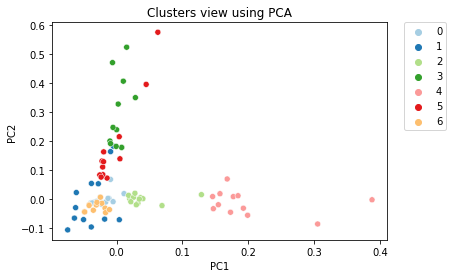

In [331]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [332]:
df_user_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')
for cluster in df_food_scaled['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Fish, NS as to type, cooked, NS as to cooking ..."
0,"Rice, fried, with chicken"
0,"Oatmeal, instant, plain, made with water, fat ..."
0,"Squash, baby food, strained"
0,"Roll, bran, NS as to type of bran"
0,"Rice, wild, 100%, cooked, fat added"
0,"Vegetable soup, cream of, prepared with milk"
0,"Pie, cherry, two crust"
0,"Ocean perch, coated, fried"


,Description
cluster,
2,"Potato chips, NFS"
2,"Garlic bread, NFS"
2,"Egg omelet or scrambled egg, with cheese and m..."
2,"Whipped topping, fat free"
2,"Taco or tostada with meat, beans, and sour cream"
2,Lasagna with meat and spinach
2,"Cream puff, no filling or icing"
2,"Catfish, coated, baked or broiled, made with b..."
2,M&M's Peanut Chocolate Candies


,Description
cluster,
5,Cereal (Kellogg's Frosted Flakes)
5,Cereal (Quaker Christmas Crunch)
5,Cereal (Malt-O-Meal Cocoa Dyno-Bites)
5,"Livers, chicken, chopped, with eggs and onion"
5,Cereal (Kellogg's Special K Red Berries)
5,Cereal (Malt-O-Meal Tootie Fruities)
5,"Mixed cereal with bananas, baby food, dry, ins..."
5,"Nutrition bar or meal replacement bar, NFS"
5,Cereal (Post Golden Crisp)


,Description
cluster,
4,"Milk chocolate candy, plain"
4,"Cheese, Gruyere"
4,"Cookie, coconut"
4,"Cheese, Swiss, reduced sodium"
4,"Cake, pound, Puerto Rican style"
4,"Cheese, American, reduced sodium"
4,Soybean oil
4,"Coconut cream, canned, sweetened"
4,"Peanuts, chocolate covered"


,Description
cluster,
1,"Wheat bran, unprocessed"
1,"Nutritional powder mix, sugar free (Slim Fast)"
1,"Oat bran, uncooked"
1,"Vegetable mixture, dried"
1,Chia seeds
1,"Cereal, bran flakes"
1,Cereal (General Mills Fiber One Honey Clusters)
1,Yeast
1,"Papad, grilled or broiled"


,Description
cluster,
6,"Crackers, breakfast biscuit"
6,"Tannier, cooked"
6,"Beans, from canned, NS as to type, no added fat"
6,"Potato chips, popped, flavored"
6,"Popcorn, ready-to-eat packaged, plain, light"
6,"Peanuts, NFS"
6,Baked beans from fast food / restaurant
6,"Green peas, NS as to form, cooked"
6,"Pizza with pepperoni, from school lunch, thin ..."


,Description
cluster,
3,"Oysters, raw"
3,"Oysters, canned"
3,"Oysters, coated, baked or broiled, fat added"
3,Cereal (Kellogg's All-Bran Complete Wheat Flakes)
3,Oyster fritter
3,"Oysters, baked or broiled, no added fat"
3,"Oysters, baked or broiled, fat added"
3,"Oysters, steamed"
3,"Oysters, cooked, NS as to cooking method"


**Recommending Food**

In [333]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

0    13.474416
2     3.802906
6     1.677195
5     1.473784
4     1.420088
1     1.113708
3     1.037903
Name: cluster, dtype: float64

Total food:  23


In [334]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Vitamin_C,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
0,0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,...,5.0,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
1,0,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,...,0.1,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
2,0,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,...,0.0,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


In [335]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Lutein and Zeaxanthin,...,Iron,Magnesium,Phosphorus,Potassium,Sodium,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_K,cluster_pct
0,0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0,...,0.03,3,14,51,17,0.05,0.011,5.0,0.3,13.474416
1,0,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0,...,0.00,12,103,157,39,0.56,0.060,0.1,0.2,13.474416
2,0,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0,...,0.00,12,101,150,38,0.54,0.061,0.0,0.3,13.474416


In [336]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    foods = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,foods], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
final_Food.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Vitamin_C,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
0,0,Mushrooms,"Mushrooms, fresh, cooked, no added fat",75219011,0,0,4.06,0,21.6,1.2,...,2.2,0.01,0.0,0.000752,0.025974,0.027200,0.000000,0.006575,0.003893,0.000067
1,0,Skittles,Skittles,91745100,0,0,90.78,0,0.0,0.0,...,66.8,0.17,1.1,0.049879,0.000000,0.001314,0.000000,0.000202,0.000000,0.001138
2,0,Pretzels,"Pretzels, soft, ready-to-eat, coated or flavored",54408422,9,0,66.02,13,17.6,1.6,...,0.0,0.64,2.9,0.044376,0.034632,0.015543,0.006555,0.009205,0.016299,0.004284


In [337]:
final_Food[['Description']]

,Description
0,"Mushrooms, fresh, cooked, no added fat"
1,Skittles
2,"Pretzels, soft, ready-to-eat, coated or flavored"
3,"Herring, smoked, kippered"
4,"Rice, cream of, cooked, made with milk"
5,"Salmon, coated, baked or broiled, made with co..."
6,"Pie, lemon, fried pie"
7,"Infant formula, NS as to form (Similac Go and ..."
8,"Chicken noodle dinner, baby food, strained"
9,"Tea, hot, chamomile"


In [ ]:
list_of_foods = final_Food['Description'].to_list()
print(list_of_foods)

['Chicken or turkey and vegetables including carrots, broccoli, and/or dark-green leafy; no potatoes, gravy', 'Seven and Seven', 'Egg roll, meatless', 'Chicken or turkey, rice, and vegetables including carrots, broccoli, and/or dark-green leafy; cream sauce, white sauce, or mushroom sauce', 'Egg omelet or scrambled egg, with meat, no added fat', 'Bouillabaisse', 'Broccoli slaw salad', 'Yogurt, Greek, nonfat milk, plain', 'Bread, raisin', 'Yuca fries', 'Asparagus, NS as to form, cooked', 'Vegetable lasagna, frozen meal', 'Halibut, baked or broiled, made with cooking spray', 'Macaroni with vegetables, baby food, strained', 'Cake or cupcake, marble, with icing or filling', 'Chicken fillet wrap sandwich, fried, from fast food', 'Potato skins, with cheese', 'Toffee, chocolate-coated, with nuts', 'Kidney beans, from canned, reduced sodium', 'Popcorn, movie theater, with added butter']
